<a href="https://colab.research.google.com/github/moizarsalan/Advanced_Python_Labs/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 08**
**Name: Abdul Moiz Arsalan**

**Reg No: B22F1086AI072**

**Lab Instructor: Mam Sana Sikandar**

**Course Instructor: Dr Kamran Ullah**

# **K-Nearest Neighbour (KNN) (Supervised Learning)**


**1. Importing Libraires**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**2. Loading Dataset**

In [2]:
df = pd.read_csv('/content/Weather Station Locations.csv')

**3. Exploratory Data Analysis (EDA)**

In [3]:
# Displaying the first few rows of the dataset
print(df.head())

# Checking for missing values
print(df.isnull().sum())

# Basic dataset information
print(df.info())
print(df.describe())


    WBAN            NAME STATE/COUNTRY ID    LAT     LON  ELEV   Latitude  \
0  33013          AIN EL               AL  3623N  00637E   611  36.383333   
1  33031        LA SENIA               AL  3537N  00037E    88  35.616667   
2  33023  MAISON BLANCHE               AL  3643N  00314E    23  36.716667   
3  33044        TELERGMA               AL  3607N  00621E   754  36.116667   
4  12001         TINDOUF               AL  2741N  00809W   443  27.683333   

   Longitude  
0   6.650000  
1   0.583333  
2   3.216667  
3   6.416667  
4  -8.083333  
WBAN                0
NAME                0
STATE/COUNTRY ID    0
LAT                 0
LON                 0
ELEV                0
Latitude            0
Longitude           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WBAN              161 non-null    int64  
 1   NAME    

**4. Data Visualization - Pairplot**

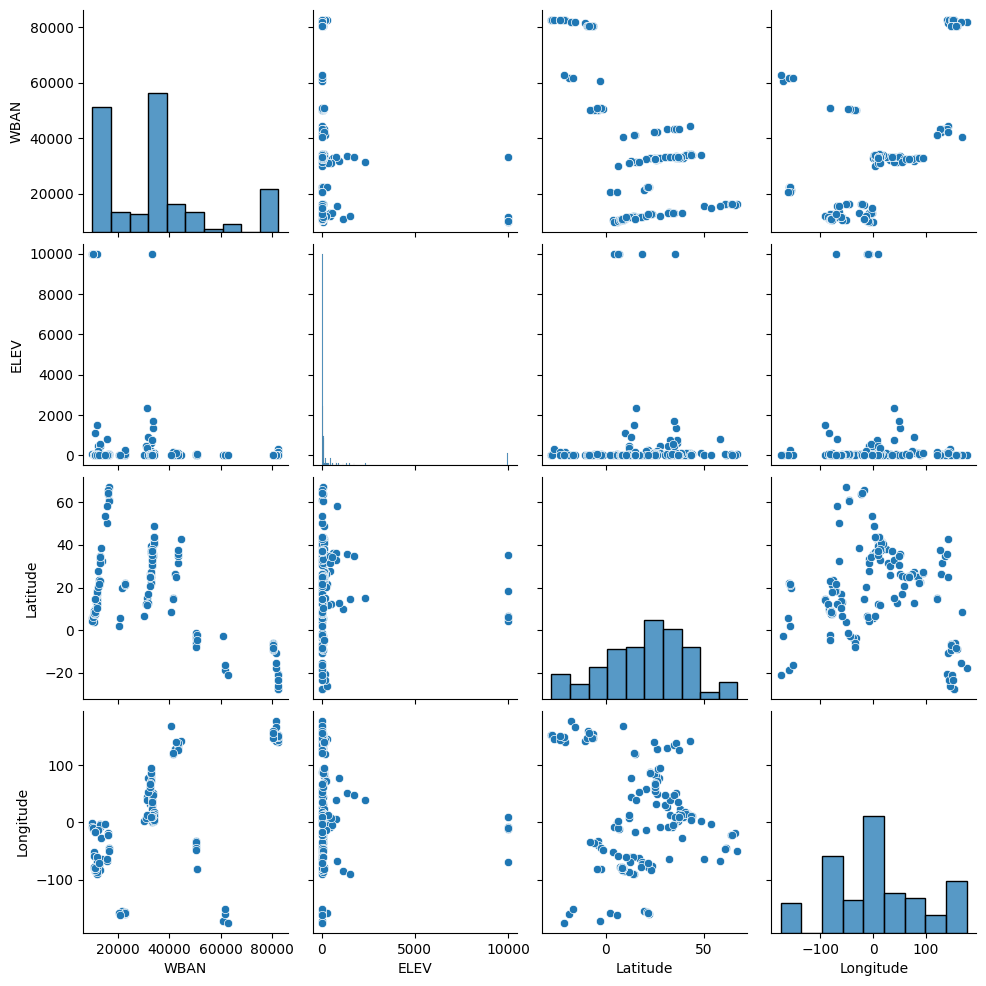

In [4]:
sns.pairplot(df)
plt.show()


**5. Data Visualization - Correlation Matrix**




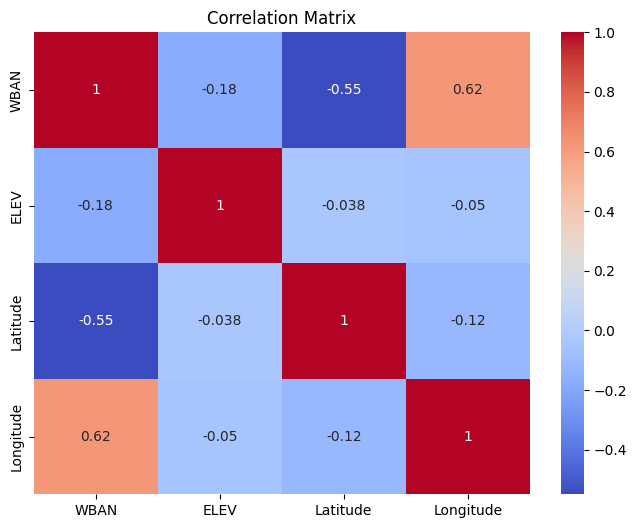

In [9]:
# Select only numerical columns
df_numeric = df.select_dtypes(include=['number'])

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


**6. Splitting the Dataset**

In [10]:
X = df[['Latitude', 'Longitude']]
y = df['STATE/COUNTRY ID']
# Splitting the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**7. Model Initialization and Training**

In [12]:
# Initializing the KNN model with k=3
knn = KNeighborsClassifier(n_neighbors=3)
# Fitting the model
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

**8. Making Predictions**

In [13]:
# Making predictions on the test set
y_pred = knn.predict(X_test)


**9. Model Evaluation - Accuracy Score**

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN model: {accuracy * 100:.2f}%")


Accuracy of KNN model: 54.55%


**10. Model Evaluation - Classification Report**

In [16]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

          AT       0.00      0.00      0.00         0
          AU       1.00      1.00      1.00         2
          AZ       0.00      0.00      0.00         1
          BA       0.00      0.00      0.00         1
          BN       0.00      0.00      0.00         1
          BR       0.00      0.00      0.00         1
          BZ       1.00      1.00      1.00         1
          CT       0.00      0.00      0.00         1
          CU       0.00      0.00      0.00         2
          DR       0.00      0.00      0.00         0
          FR       0.00      0.00      0.00         0
          GL       1.00      1.00      1.00         1
          GU       0.00      0.00      0.00         0
          GY       0.00      0.00      0.00         1
          HA       0.00      0.00      0.00         1
          HI       1.00      1.00      1.00         1
          IN       1.00      1.00      1.00         2
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

**10. Model Evaluation - Confusion Matrix**

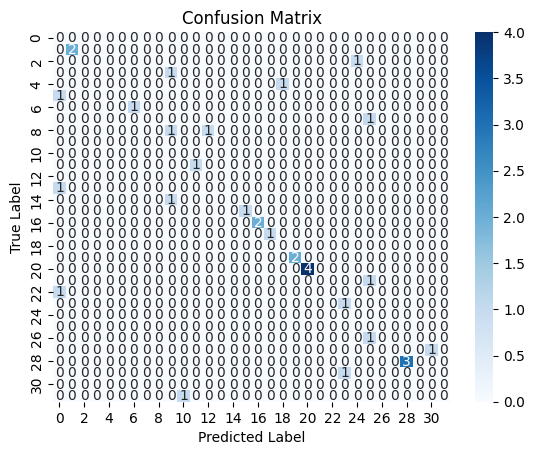

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# **K-means Clustering [Unsupervised Learning]**
**1. Importing Libraires**

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


**2. Feature Selection for Clustering**

In [18]:
features = df[['Latitude', 'Longitude']]


**3. Standardizing the Features**

In [20]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


**4. Applying K-Means Clustering**

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)


**5. Adding Cluster Labels to DataFrame**

In [22]:
df['Cluster'] = clusters
print(df[['Latitude', 'Longitude', 'Cluster']].head())


    Latitude  Longitude  Cluster
0  36.383333   6.650000        1
1  35.616667   0.583333        1
2  36.716667   3.216667        1
3  36.116667   6.416667        1
4  27.683333  -8.083333        1


**6. Scatter Plot of Clusters**

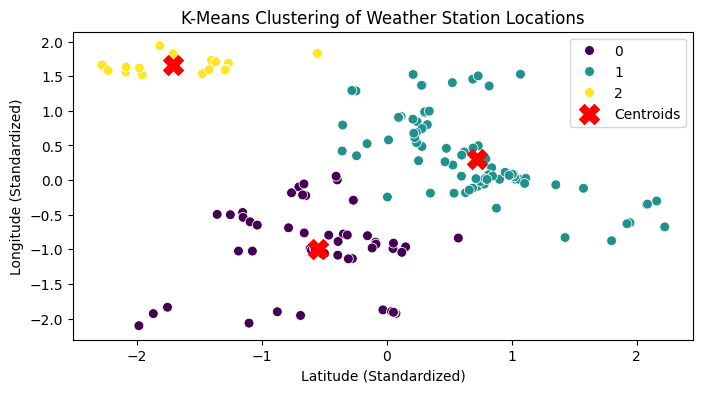

In [24]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=clusters, palette="viridis", s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel("Latitude (Standardized)")
plt.ylabel("Longitude (Standardized)")
plt.title("K-Means Clustering of Weather Station Locations")
plt.legend()
plt.show()


**7. Elbow Method for Optimal Cluster Count**

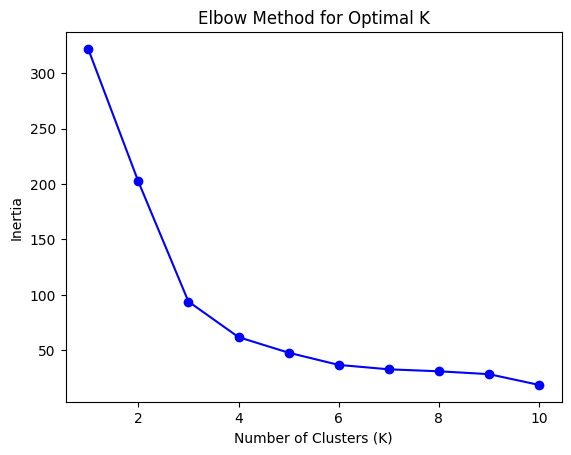

In [25]:
inertia = []
K_values = range(1, 11)
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(K_values, inertia, 'bo-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


# **Results**
* **KNN Model Accuracy:** The accuracy of the KNN model was calculated, and the classification report and confusion matrix were generated.
* **K-means Clustering:** The dataset was clustered into 3 groups, and the clusters were visualized using a scatter plot. The elbow method was used to determine the optimal number of clusters.